# Data Paths and Prep

### Paths

In [ ]:
# Kaja von Volkmann
ATAC_seq_path = ""
RNA_seq_path = ""
Transcription_exons_path = ""
Cell_population_qc_path = ""
Voluntary_path = ""

In [ ]:
# Pia Kentschke
ATAC_seq_path = "/Users/piakentschke/Documents/Uni/Data Analysis/ImmGenATAC18_AllOCRsInfo.csv"
RNA_seq_path = "/Users/piakentschke/Documents/Uni/Data Analysis/RNA-seq_data.csv"
Transcription_exons_path = "/Users/piakentschke/Documents/Uni/Data Analysis/refFlat.txt"
Cell_population_qc_path = "/Users/piakentschke/Documents/Uni/Data Analysis/mmc1.xlsx"
Voluntary_path = "/Users/piakentschke/Documents/Uni/Data Analysis/ImmGenATAC18_AllTFmotifsInOCRs.txt"

In [ ]:
# Helen Mennenoeh
ATAC_seq_path = ""
RNA_seq_path = ""
Transcription_exons_path = ""
Cell_population_qc_path = ""
Voluntary_path = ""

In [2]:
# Laila Frisius
ATAC_seq_path = "/Users/laila/github/bioinfo25/Raw_data/ATAC-seq_called-peaks_ImmGenATAC18_AllOCRsInfo.csv"
RNA_seq_path = "/Users/laila/github/bioinfo25/Raw_data/RNA-seq_mmc2.csv"
Transcription_exons_path = "/Users/laila/github/bioinfo25/Raw_data/Transkrips-exon_refFlat.txt"
Cell_population_qc_path = "/Users/laila/github/bioinfo25/Raw_data/cell-populations_qc-matrices_mmc1.xlsx"
Voluntary_path = "/Users/laila/github/bioinfo25/Raw_data/voluntary_ImmGenATAC18_AllTFmotifsInOCRs.txt"

### Packages

In [3]:
# import of packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats
import sklearn.manifold as sklm
import os
from sklearn.decomposition import PCA

### Data Sets

In [4]:
# Load data sets
ATAC_seq = pd.read_csv(ATAC_seq_path, keep_default_na=False)
RNA_seq = pd.read_csv(RNA_seq_path)
Cell_population_qc = pd.read_excel(Cell_population_qc_path)
exons=pd.read_csv(Transcription_exons_path, sep="\t")
exons.columns = ["Genname", "ID", "Chromosom", "Strand", "Transcription Start", "Transcription End", "CDS_Start", "CDS_End", 
    "ExonCount", "ExonStarts", "ExonEnds"]

# Create data subsets
col_ATAC_seq_ab_act_gd_T = ['LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM','preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th',
    'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th',
    'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp', 'T.8.Nve.Sp', 'T.4.Sp.aCD3+CD40.18hr',
    'Treg.4.FP3+.Nrplo.Co', 'Treg.4.25hi.Sp', 'T8.TN.P14.Sp',
    'T8.IEL.LCMV.d7.SI', 'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp',
    'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp',
    'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d',
    'Tgd.g2+d17.24a+.Th', 'Tgd.g2+d17.LN', 'Tgd.g2+d1.24a+.Th',
    'Tgd.g2+d1.LN', 'Tgd.g1.1+d1.24a+.Th', 'Tgd.g1.1+d1.LN', 'Tgd.Sp']

col_ATAC_seq_ab_act_T = ['LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM','preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th',
    'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th',
    'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp', 'T.8.Nve.Sp', 'T.4.Sp.aCD3+CD40.18hr',
    'Treg.4.FP3+.Nrplo.Co', 'Treg.4.25hi.Sp', 'T8.TN.P14.Sp',
    'T8.IEL.LCMV.d7.SI', 'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp',
    'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp',
    'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d']

col_ATAC_seq_gd_T = ['LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM','Tgd.g2+d17.24a+.Th', 'Tgd.g2+d17.LN', 'Tgd.g2+d1.24a+.Th',
    'Tgd.g2+d1.LN', 'Tgd.g1.1+d1.24a+.Th', 'Tgd.g1.1+d1.LN', 'Tgd.Sp']

col_ATAC_seq_ab_T = ['LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM','preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th',
    'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th',
    'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp', 'T.8.Nve.Sp', 'T.4.Sp.aCD3+CD40.18hr',
    'Treg.4.FP3+.Nrplo.Co', 'Treg.4.25hi.Sp']

ATAC_seq_ab_act_gd_T = ATAC_seq[col_ATAC_seq_ab_act_gd_T]
ATAC_seq_gd_T = ATAC_seq[col_ATAC_seq_gd_T]
ATAC_seq_ab_act_T = ATAC_seq[col_ATAC_seq_ab_act_T]
ATAC_seq_ab_T = ATAC_seq[col_ATAC_seq_ab_T]

### Check Data Sets before cleaning

In [8]:
# qc metrics
print(f"NaN in QC-metrics data set: {Cell_population_qc.isna().sum().sum()}")

# ATAC-seq
    # check for inf values
ATAC_inf = ATAC_seq.isin([np.inf, -np.inf]).sum()
print(f"Infinite values in ATAC_seq: {ATAC_inf[ATAC_inf > 0].sum()}")

    # check for NaN values
print(f"NaN in ATAC_seq data set: {ATAC_seq.isna().sum().sum()}")

print(len(Cell_population_qc))
print(len(ATAC_seq.columns))

NaN in QC-metrics data set: 5
Infinite values in ATAC_seq: 5
NaN in ATAC_seq data set: 0
181
98


# Data Clean up and Normalization
---

### Set Thresholds

In [9]:
# Setting thresholds qc metrics
qc_thresholds = {
"%fragment.1Kb_TSS": ("min", 6),
"Paired.read.after.removing.PCR.duplication": ("min", 3000),
"%chrM.mapped": ("max", 5),
"Replicate.cor": ("min", 0),
"InputCellNumber": ("min", 500)
}

# Setting threshold ATAC-seq (p = 0.05)
threshold_pval = 1.3

### Removal of N/A and interfering values

In [12]:
# QC metrics
    # remove N/A 
qc_clean = Cell_population_qc.copy()
qc_clean = qc_clean.dropna(subset=[
    "%fragment.1Kb_TSS",
    "Paired.read.after.removing.PCR.duplication",
    "%chrM.mapped",
    "Replicate.cor",
    "InputCellNumber"
])

# ATAC-seq
    # show rows of infinite -log10 p values
inf_rows = ATAC_seq[ATAC_seq['_-log10_bestPvalue'].isin([np.inf, -np.inf])]

    #drop peaks with infinite -log10 p values
ATAC_seq_clean = ATAC_seq[ATAC_seq['_-log10_bestPvalue'] != np.inf]

    # range of -log10 p-values
pvalues = ATAC_seq_clean["_-log10_bestPvalue"]

min_pval = pvalues.min()
max_pval = pvalues.max()
print(f"Minimum -log10 p-value: {min_pval}")
print(f"Maximum -log10 p-value: {max_pval}")

# RNA-seq
print(RNA_seq.isna().sum().sum())
print((RNA_seq.iloc[:, 1:] < 5).sum().sum())
numerical_data=RNA_seq.iloc[:, 1:]
    #gesamtsumme berechnen
sample_sums=numerical_data.sum(axis=0)
low_sum_samples=sample_sums[sample_sums <= 100]
print(low_sum_samples)
    #varianz berechnen
sample_variance=numerical_data.var(axis=0)
low_variance_samples=sample_variance[sample_variance <= 0.5]
print(low_variance_samples)

Minimum -log10 p-value: 0.0
Maximum -log10 p-value: 260.12
0
587020
Series([], dtype: float64)
Series([], dtype: float64)


### Code for Data Filtering

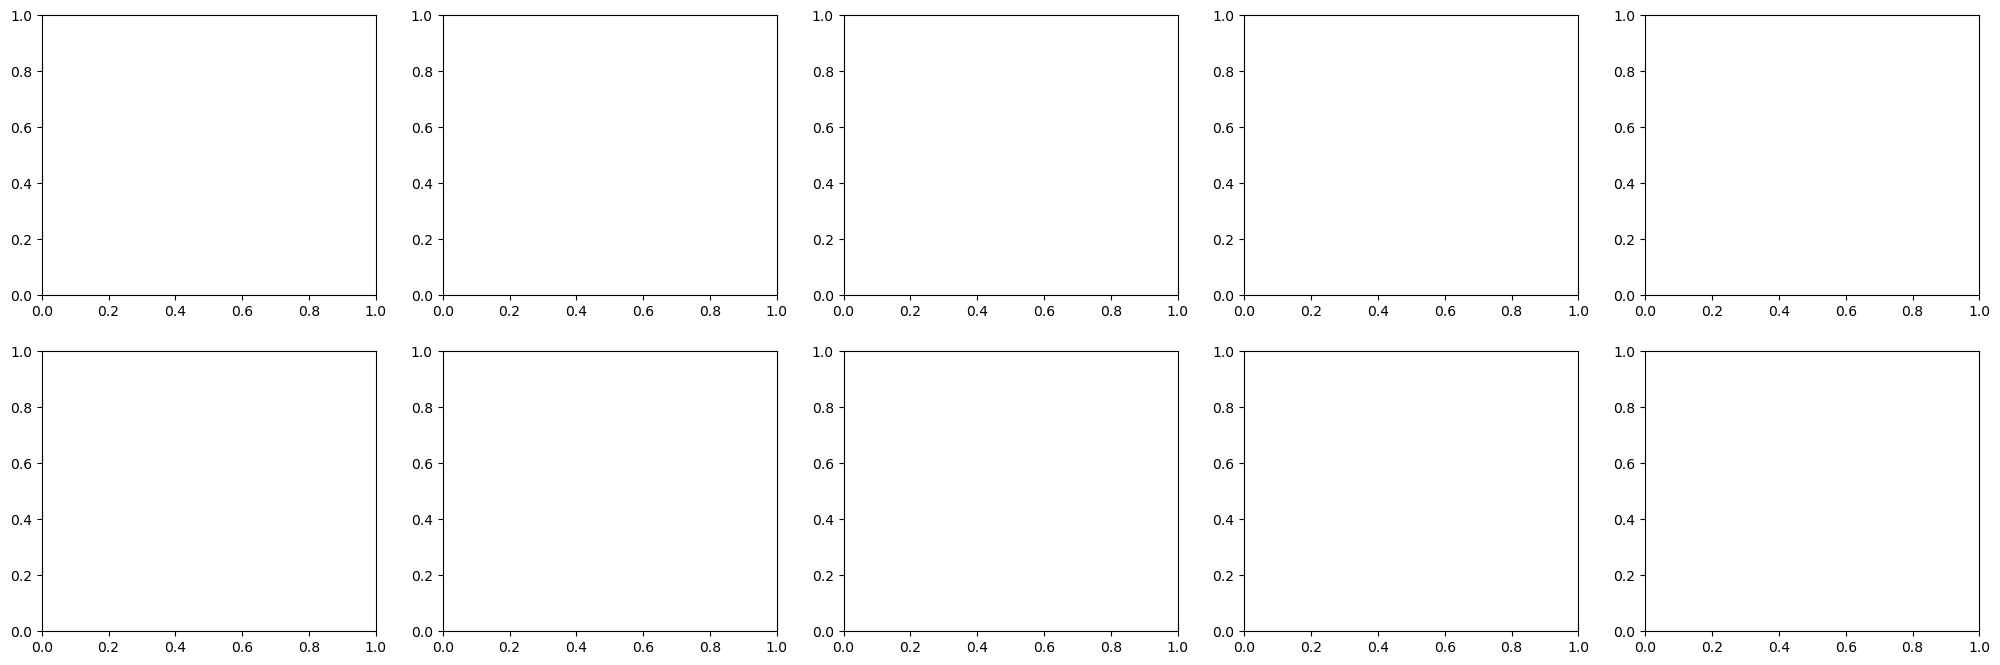

In [14]:
metrics = [
    ("%fragment.1Kb_TSS", "TSS enrichment"),
    ("Paired.read.after.removing.PCR.duplication", "nFrags"),
    ("%chrM.mapped", "chrM mapped (%)"),
    ("Replicate.cor", "Replicate correlation"),
    ("InputCellNumber", "Input cell number")
]
fig, axes = plt.subplots(2, len(metrics), figsize=(5*len(metrics), 8))

# Filtering with thresholds
def apply_qc_thresholds (df, qc_thresholds):
    import operator

    mask = pd.Series(True, index = df.index)
    for col, (bound, val) in qc_thresholds.items():
        if bound == "min":
            mask&= df[col] >= val
        elif bound == "max":
            mask&= df[col] <= val
    return df[mask].copy()

In [15]:
# QC metrics
qc_filtered = apply_qc_thresholds(qc_clean, qc_thresholds)

# Filter ATAC-seq peaks based on logp value threshold 
ATAC_seq_filtered = ATAC_seq_clean[ATAC_seq_clean["_-log10_bestPvalue"] >= threshold_pval]

# apply qc metrics on ATAC-seq
ATAC_seq_meta_cols = list(ATAC_seq_clean.loc[:,:'genes.within.100Kb'].columns)
qc_filtered_cols = list(qc_filtered['CellType'])
ATAC_qc_cell_cols = [ col for col in ATAC_seq_clean.columns if col in qc_filtered_cols]
ATAC_qc_all_cols = ATAC_seq_meta_cols + ATAC_qc_cell_cols
print(f"Behaltene Zelltypen: {len(qc_filtered_cols)}")

print(qc_filtered_cols)


Behaltene Zelltypen: 96
['proB.FrBC.BM', 'proB.FrBC.BM', 'preB.FrD.BM', 'preB.FrD.BM', 'B.FrE.BM', 'B.T1.Sp', 'B.T1.Sp', 'B.T2.Sp', 'B.T2.Sp', 'B.T3.Sp', 'B.T3.Sp', 'B.MZ.Sp', 'B.MZ.Sp', 'B.Fo.Sp', 'B.Fo.Sp', 'B.Fo.Sp', 'B.GC.CB.Sp', 'B.GC.CB.Sp', 'B.GC.CC.Sp', 'B.GC.CC.Sp', 'B.PB.Sp', 'B.PB.Sp', 'B.PC.Sp', 'B.mem.Sp', 'B.mem.Sp', 'B.Sp', 'B.Sp', 'B.Fem.Sp', 'preT.DN3.Th', 'T.DP.Th', 'T.4.Th', 'T.4.Nve.Sp', 'T.4.Nve.Sp', 'Treg.4.25hi.Sp', 'Treg.4.25hi.Sp', 'T.8.Nve.Sp', 'T8.TN.P14.Sp', 'T8.IEL.LCMV.d7.SI', 'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp', 'T8.Tem.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp', 'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.3d', 'NKT.Sp.LPS.3d', 'Tgd.g2+d17.24a+.Th', 'Tgd.g2+d1.24a+.Th', 'Tgd.g2+d1.24a+.Th', 'Tgd.g1.1+d1.24a+.Th', 'Tgd.g1.1+d1.LN', 'Tgd.Sp', 'NK.27-11b+.BM', 'NK.27-11b+.BM', 'NK.27-11b+.Sp', 'ILC2.SI', 'ILC2.SI', 'ILC3.NKp46-CCR6-.SI', 'ILC3.NKp46-CCR6-.SI', 'ILC3.NKp46+.SI', 'ILC3.CCR6+.SI', 'GN.BM', 'GN.BM', 'GN.Sp', 'GN.Sp', 'GN.Thio.PC', 'GN.Thio.PC', 'GN.Thi

### Data Sets after Cleaning

### Call of specific columns etc.

In [16]:
# Extract the peakID column 
peak_id_col = ATAC_seq_filtered[["ImmGenATAC1219.peakID"]]

# Extract the accessibility score columns
score_cols = ATAC_seq_filtered.loc[:, "LTHSC.34-.BM":]
score_abgd = ATAC_seq_filtered[col_ATAC_seq_ab_act_gd_T]

# Create data frame with only scores per peak
ATAC_scores = pd.concat([peak_id_col, score_cols], axis=1)

### Normalization

In [17]:
RNA_seq_log2=RNA_seq.copy()
RNA_seq_log2.iloc[:, 1:]=np.log2(RNA_seq.iloc[:, 1:])

In [18]:
# log2-transformation
peak_signal_log = np.log2(score_abgd+1)
spaltenpositionen = [peak_signal_log.columns.get_loc(name) for name in col_ATAC_seq_ab_T]

# Exploratory Data
---

In [19]:
# Plotting of data qc
for i, (col, label) in enumerate(metrics):
    sns.violinplot(y=qc_clean[col], ax=axes[0, i], color='skyblue')
    axes[0, i].set_title(f"{label}\n(raw data)")
    sns.violinplot(y=qc_filtered[col], ax=axes[1,i], color= 'lightgreen')
    axes[1,i].set_title(f"{label}\n(filtered data)")

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

### Variance of peak signal

In [19]:
# Extract the peakID column 
peak_id_col = ATAC_seq_filtered[["ImmGenATAC1219.peakID"]]

# Extract the accessibility score columns
score_cols = ATAC_seq_filtered.loc[:, "LTHSC.34-.BM":]

# Create data frame with only scores per peak
ATAC_scores = pd.concat([peak_id_col, score_cols], axis=1)

# calculate mean accessibility score for each peak
mean_accessibility_per_peak = ATAC_scores.mean(axis=1, numeric_only=True)

# calculate median accessibility score for each peak
median_accessibility_per_peak = ATAC_scores.median(axis=1, numeric_only=True)

# calculate standard deviation of accessibility scores for each peak
sd_accessibility_per_peak = ATAC_scores.std(axis=1, numeric_only=True)

# variance within cell type
variance_within_cell = ATAC_scores.var(axis = 0, numeric_only = True)

# variance across cell types (for each peak)
variance_across_cells = ATAC_scores.var(axis = 1, numeric_only=True)

# create summary data frame
mean_med_sd_df = pd.DataFrame({
    "Mean Accessibility": mean_accessibility_per_peak,
    "Median Accessibility": median_accessibility_per_peak,
    "Standard Deviation": sd_accessibility_per_peak,
    "Variance across cells": variance_across_cells,
})

#print(ATAC_scores)
#print(mean_accessibility_per_peak)
#print(mean_med_sd_df)
print(mean_med_sd_df)
print(variance_within_cell)



        Mean Accessibility  Median Accessibility  Standard Deviation  \
2                 1.521000                 0.495            6.716484   
3                 0.874556                 0.530            1.533709   
4                 0.882111                 0.630            0.816587   
5                 1.096556                 0.785            1.218798   
6                 0.944556                 0.680            1.262417   
...                    ...                   ...                 ...   
512588            5.823889                 4.955            3.648828   
512589            5.526444                 4.705            4.053177   
512590            6.936111                 5.775            4.887909   
512591            6.995111                 6.440            4.386282   
512594            1.751778                 1.420            1.481127   

        Variance across cells  
2                   45.111153  
3                    2.352263  
4                    0.666815  
5      

### PCA RNA-seq

In [ ]:
#ohne gennamen
data=RNA_seq_log2.iloc[:, 1:]
#auswahl der 1000 variablesten gene
variances=data.var(axis=1)
top_genes=variances.nlargest(1000).index
#transponieren
data_T=data.T
#mittelwertzentrierung?
data_centered=data_T-data_T.mean(axis=0)
# matrix mit Kovarianz
cov_matrix=np.cov(data_centered, rowvar=False)
# Eigenwerte und Eigenvektoren
eig_vals, eig_vecs=np.linalg.eigh(cov_matrix)
# ansteigend sortieren
sorted_idx=np.argsort(eig_vals)[::-1]
eig_vals=eig_vals[sorted_idx]
eig_vecs=eig_vecs[:, sorted_idx]
#ersten zwei PCs
pc1=data_centered @ eig_vecs[:, 0]
pc2=data_centered @ eig_vecs[:, 1]
#plot
plt.figure(figsize=(8, 6))
plt.scatter(pc1, pc2)
#achsen labeln
for i, sample in enumerate(data_T.index):
    plt.text(pc1[i] + 0.2, pc2[i], sample, fontsize=9)

plt.xlabel(f"PC1 ({eig_vals[0]/eig_vals.sum()*100:.1f}%)")
plt.ylabel(f"PC2 ({eig_vals[1]/eig_vals.sum()*100:.1f}%)")
plt.title("PCA der RNA-Seq Samples")
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
def gini_index_peak(peak_counts):
    n = len(peak_counts)
    x = np.array(peak_counts)
    if np.any(x < 0):
        x = x - np.min(x)
    sum_x = np.sum(x)
    if sum_x == 0:
        return 0.0
    s = np.abs(x[:, None] - x).sum()
    G = s / (2 * n * sum_x)
    return G

In [ ]:
# Matrix für t-SNE
M_tSNE_peaks = np.array(peak_signal_log)
M_tSNE_small = M_tSNE_peaks[:100,:4]
M_tSNE_ab_T = M_tSNE_peaks[:, spaltenpositionen]

# test t-SNE
#tsne_peaks_small = sklm.TSNE(n_components = 2, perplexity=30, random_state=42)
#M_tSNE_test = tsne_peaks_small.fit_transform(M_tSNE_small)

# t-SNE ab
tsne_peaks_ab_T = sklm.TSNE(n_components = 2, perplexity=30, random_state=42)
M_tSNE_ab_T = tsne_peaks_ab_T.fit_transform(M_tSNE_ab_T)

# t-SNE
# tsne_peaks = sklm.TSNE(n_components=2, perplexity=30, random_state=42)
# M_tSNE_peaks_embedded = tsne_peaks.fit_transform(M_tSNE_peaks)

plt.figure(figsize=(8,6))
plt.scatter(M_tSNE_ab_T[:,0], M_tSNE_ab_T[:,1], s=5, alpha=0.7)
plt.title('t-SNE der Peaks (ATAC-seq)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.tight_layout()
plt.show()

In [44]:
score_gd= ATAC_seq[col_ATAC_seq_gd_T]
peak_signal_gd_log = np.log2(score_gd+1)
type(peak_signal_gd_log)

pandas.core.frame.DataFrame

In [75]:
# def t-SNE
def tSNE (df, cells, components, perplexity, peaks=None, gini_coloring=None):
    '''
    df: pandas.df [cells x features]
    cells: list of cell row names
    components: no. of PCAs < len(cells)
    perplexity: perplexity < len(cells)
    gini_coloring: feature that should be colored, automatically maximun, manually after e.g. specifig gene/ peak possible
    '''
    
    # preparation of data
    if peaks is not None:
        subset_df = df.loc[cells, peaks]
    else:
        subset_df = df.loc[cells, :]
    components = min(components, subset_df.shape[0], subset_df.shape[1])
    perplexity = min(perplexity, subset_df.shape[0] - 1)

    # PCA
    pca = PCA(n_components= components)
    pcs = pca.fit_transform(subset_df)

    # t-SNE
    tsne = sklm.TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_results = tsne.fit_transform(pcs)
    tsne_df = pd.DataFrame(tsne_results, columns=['tSNE1', 'tSNE2'], index=subset_df.index)

    # gini index
    def gini_index (x):
        x = np.array(x)
        x = np.sort(x)
        n = len(x)
        if np.mean(x) == 0:
            return 0.0
        diff_sum = np.abs(np.subtract.outer(x, x)).sum()
        return diff_sum / (2 * n**2 * np.mean(x))
    
    gini_scores = subset_df.apply(gini_index, axis=0)
    
    # coloring
    if gini_coloring is None:
        name_gini_coloring = gini_scores.idxmax()
    elif isinstance(gini_coloring, int):
        name_gini_coloring = subset_df.columns[gini_coloring]
    else:
        name_gini_coloring = gini_coloring

    color_values = subset_df[name_gini_coloring].values

    # plot
    plt.figure(figsize=(8,6))
    sc = plt.scatter(tsne_df['tSNE1'], tsne_df['tSNE2'], c=color_values, cmap='viridis', alpha=0.7)
    plt.colorbar(sc, label=f'activity of {name_gini_coloring}')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.title(f't-SNE, colored with gini index after peak: {name_gini_coloring}')
    plt.tight_layout()
    plt.show()

    return tsne_df, gini_scores

transp_ATAC = ATAC_seq.T

[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


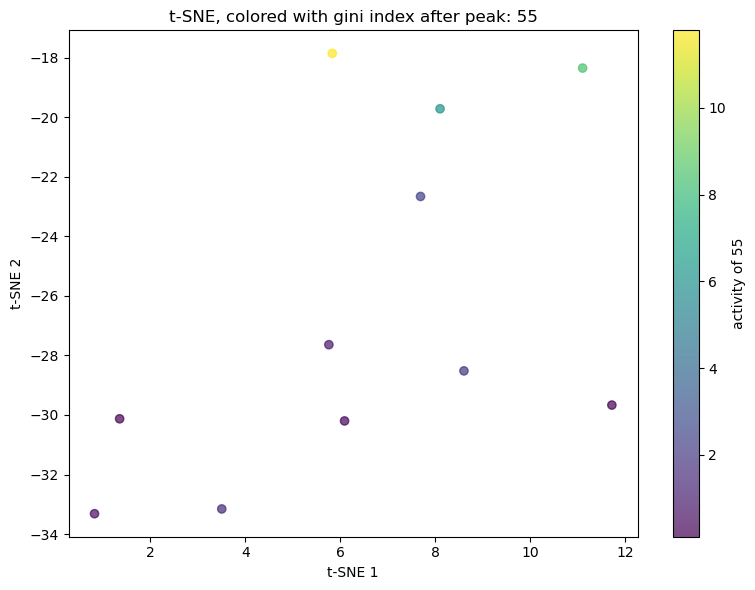

In [76]:
peaks_test=transp_ATAC.columns[50:101]
print(list(peaks_test))
tsne_df, gini_scores = tSNE(transp_ATAC, col_ATAC_seq_gd_T, 5, 5, peaks_test)

        PC1       PC2       PC3       PC4       PC5
0 -2.148429 -0.663440 -0.404194  0.386251  1.552608
1 -2.217895  0.292934 -0.132293 -0.383385  0.232015
2 -2.974988  0.435052  0.543486  0.847133 -0.339013
3 -3.925404 -0.181527 -0.230845  0.414763  0.178205
4 -2.584414 -1.098452 -0.564532  0.477588 -1.202043
(512595, 5)


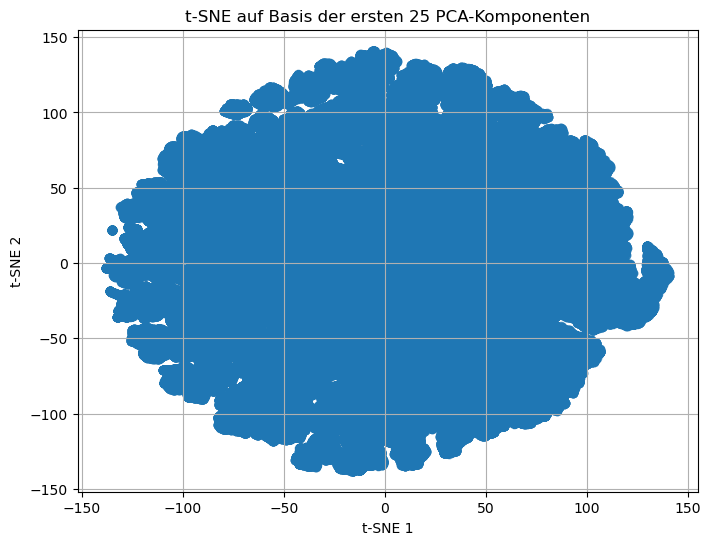

In [38]:
pca = PCA(n_components=5)
pcs = pca.fit_transform(peak_signal_gd_log)

# data frame od 25 PC
pca_df = pd.DataFrame(
    pcs,
    columns=[f'PC{i+1}' for i in range(5)]
)

# Ausgabe anzeigen
print(pca_df.head())
print(pca_df.shape) 

# 5. t-SNE mit den PCs als Input
tsne = sklm.TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(pcs)

# 6. Ergebnisse als DataFrame für Plot
tsne_df = pd.DataFrame(tsne_results, columns=['tSNE1', 'tSNE2'])

# 7. Plot
plt.figure(figsize=(8,6))
plt.scatter(tsne_df['tSNE1'], tsne_df['tSNE2'], alpha=0.6)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE auf Basis der ersten 25 PCA-Komponenten')
plt.grid(True)
plt.show()

In [31]:
def gini_index_peak(peak_counts):
    n = len(peak_counts)
    x = np.array(peak_counts)
    if np.any(x < 0):
        x = x - np.min(x)
    sum_x = np.sum(x)
    if sum_x == 0:
        return 0.0
    s = np.abs(x[:, None] - x).sum()
    G = s / (2 * n * sum_x)
    return G

In [42]:
def gini_coefficient(x):
    x = np.sort(x)
    n = len(x)
    if np.mean(x) == 0:
        return 0
    diff_sum = np.abs(np.subtract.outer(x, x)).sum()
    return diff_sum / (2 * n**2 * np.mean(x))


# Für alle Features/Peaks in gd_log:
for feature in peak_signal_gd_log.index:
    vals = peak_signal_gd_log.loc[feature, :].values
    gini = gini_coefficient(vals)

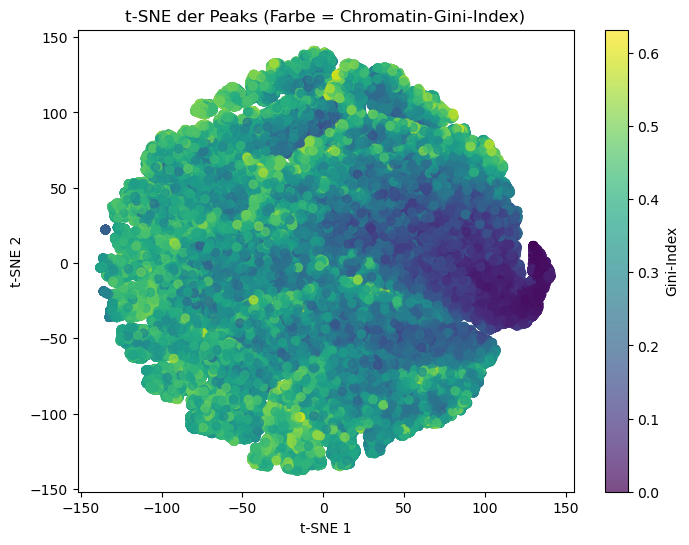

In [43]:
gini = peak_signal_gd_log.apply(gini_index_peak, axis=1)

tsne_df['gini_index'] = gini.to_numpy()

plt.figure(figsize=(8,6))
sc = plt.scatter(tsne_df['tSNE1'], tsne_df['tSNE2'], c=tsne_df['gini_index'],
                 cmap='viridis', alpha=0.7)
plt.colorbar(sc, label='Gini-Index')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE der Peaks (Farbe = Chromatin-Gini-Index)')
plt.show()

# Discriptive and Comparative Analysis

In [ ]:
test.kvv

# Statistical Analysis and Regression Models

In [ ]:
## Test lf 